# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing in front

## Get data

The images we are working with are from Food101 dataset (101 different classes of food). However we have modified it to only use two classes (pizza and steak)

>**Note:** We start with smaller dataset  so we can experiment quickly  and figure what works (or better yet what doesn't work) before scaling up

In [3]:
# import zipfile

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

## Inspect the data (become one with it)

A very crucial step  at the begininning of any machine learning project is becoming one with the data.
And for a computer vision project... this usually means visuallizing many samples of your data.

In [13]:
!ls kaggle\ projects/pizza_steak/train/steak

1000205.jpg 1647351.jpg 2238681.jpg 2824680.jpg 3375959.jpg 417368.jpg
100135.jpg  1650002.jpg 2238802.jpg 2825100.jpg 3381560.jpg 4176.jpg
101312.jpg  165639.jpg  2254705.jpg 2826987.jpg 3382936.jpg 42125.jpg
1021458.jpg 1658186.jpg 225990.jpg  2832499.jpg 3386119.jpg 421476.jpg
1032846.jpg 1658443.jpg 2260231.jpg 2832960.jpg 3388717.jpg 421561.jpg
10380.jpg   165964.jpg  2268692.jpg 285045.jpg  3389138.jpg 438871.jpg
1049459.jpg 167069.jpg  2271133.jpg 285147.jpg  3393547.jpg 43924.jpg
1053665.jpg 1675632.jpg 227576.jpg  2855315.jpg 3393688.jpg 440188.jpg
1068516.jpg 1678108.jpg 2283057.jpg 2856066.jpg 3396589.jpg 442757.jpg
1068975.jpg 168006.jpg  2286639.jpg 2859933.jpg 339891.jpg  443210.jpg
1081258.jpg 1682496.jpg 2287136.jpg 286219.jpg  3417789.jpg 444064.jpg
1090122.jpg 1684438.jpg 2291292.jpg 2862562.jpg 3425047.jpg 444709.jpg
1093966.jpg 168775.jpg  229323.jpg  2865730.jpg 3434983.jpg 447557.jpg
1098844.jpg 1697339.jpg 2300534.jpg 2878151.jpg 3435358.jpg 461187.jpg
1100074.jp

In [15]:
list_test = !ls kaggle\ projects/pizza_steak/train/steak
len(list_test)

750

## To visualize our images, first lets get the class names programmaticlly

In [16]:
# Get the classnames programmaticlly

import pathlib
import numpy as np

data_dir  = pathlib.Path("./kaggle projects/pizza_steak/train")
class_name = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class_names from subdirector
print(class_name)

['pizza' 'steak']


In [22]:
# Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
    # Setup the target directory (we will view images from here)
    target_folder = target_dir+target_class

    # Get random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}")

    return img

Image shape: (384, 512, 3)


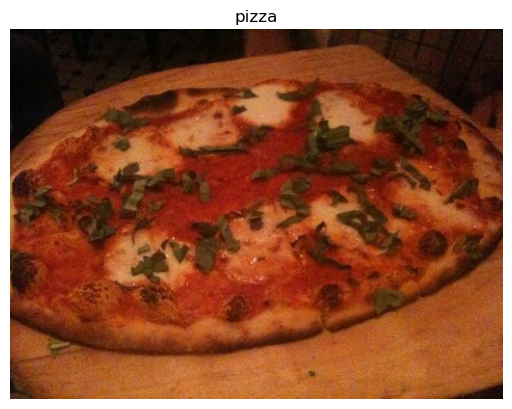

In [26]:
img = view_random_image(target_dir="./kaggle projects/pizza_steak/train/", 
                        target_class="pizza")

In [28]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
tf.config.set_visible_devices([],'GPU')

tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 4,  5,  0],
        [ 6,  7,  1],
        [ 8,  9,  3],
        ...,
        [23, 16,  8],
        [23, 19, 10],
        [26, 22, 13]],

       [[ 9,  8,  3],
        [ 9,  8,  3],
        [ 8,  9,  3],
        ...,
        [20, 13,  5],
        [19, 12,  4],
        [18, 14,  5]],

       [[15, 14,  9],
        [12, 11,  6],
        [ 9,  8,  3],
        ...,
        [20, 13,  5],
        [19, 12,  4],
        [21, 14,  6]],

       ...,

       [[84, 56, 44],
        [81, 53, 41],
        [69, 41, 29],
        ...,
        [19,  8,  2],
        [18,  7,  1],
        [21, 12,  3]],

       [[77, 47, 36],
        [76, 46, 35],
        [70, 40, 29],
        ...,
        [19, 10,  5],
        [16,  7,  0],
        [19, 10,  3]],

       [[68, 36, 25],
        [71, 39, 28],
        [71, 39, 28],
        ...,
        [20, 13,  7],
        [18, 11,  5],
        [23, 16, 10]]], dtype=uint8)>

In [29]:
# view the image shape
img.shape

(384, 512, 3)

>**Note:** As we have discussed before many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this one of the most common pre-processing steps for working with images as to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255 (255 is the maximum pixel value)

In [30]:
# get all all pixel values between 0 & 1
img/255.

array([[[0.01568627, 0.01960784, 0.        ],
        [0.02352941, 0.02745098, 0.00392157],
        [0.03137255, 0.03529412, 0.01176471],
        ...,
        [0.09019608, 0.0627451 , 0.03137255],
        [0.09019608, 0.0745098 , 0.03921569],
        [0.10196078, 0.08627451, 0.05098039]],

       [[0.03529412, 0.03137255, 0.01176471],
        [0.03529412, 0.03137255, 0.01176471],
        [0.03137255, 0.03529412, 0.01176471],
        ...,
        [0.07843137, 0.05098039, 0.01960784],
        [0.0745098 , 0.04705882, 0.01568627],
        [0.07058824, 0.05490196, 0.01960784]],

       [[0.05882353, 0.05490196, 0.03529412],
        [0.04705882, 0.04313725, 0.02352941],
        [0.03529412, 0.03137255, 0.01176471],
        ...,
        [0.07843137, 0.05098039, 0.01960784],
        [0.0745098 , 0.04705882, 0.01568627],
        [0.08235294, 0.05490196, 0.02352941]],

       ...,

       [[0.32941176, 0.21960784, 0.17254902],
        [0.31764706, 0.20784314, 0.16078431],
        [0.27058824, 0

## An end-to-end example

Lets build a convolutional neural network to find patterns in our images, more specifically we a need way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns our images
* Compile our CNN
* Fit CNN to our training data


In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set seed
tf.random.set_seed(42)

# preprocess data (get all of the pixel values between 0 & 1 also call)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "./kaggle projects/pizza_steak/train"
test_dir = "./kaggle projects/pizza_steak/test"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                          batch_size=32,
                                          target_size=(224,224),
                                          class_mode='binary',
                                          seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                          batch_size=32,
                                          target_size=(224,224),
                                          class_mode='binary',
                                          seed=42)

# build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    Dense(1, activation='sigmoid')
])


# Compile our CNN
model_1.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [35]:
# fit to our model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


2023-06-23 23:00:10.039030: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-23 23:00:10.715936: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x28e150a60 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-06-23 23:00:10.715951: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Host, Default Version
2023-06-23 23:00:10.751755: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


 1/47 [..............................] - ETA: 46s - loss: 0.6946 - accuracy: 0.5000

2023-06-23 23:00:10.949339: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


47/47 [==============================] - 17s 356ms/step - loss: 0.6333 - accuracy: 0.6167 - val_loss: 0.5838 - val_accuracy: 0.6600
Epoch 2/5
47/47 [==============================] - 16s 349ms/step - loss: 0.4972 - accuracy: 0.7533 - val_loss: 0.4671 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 17s 354ms/step - loss: 0.4312 - accuracy: 0.8093 - val_loss: 0.5029 - val_accuracy: 0.7560
Epoch 4/5
47/47 [==============================] - 17s 358ms/step - loss: 0.4019 - accuracy: 0.8200 - val_loss: 0.3298 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 17s 363ms/step - loss: 0.3110 - accuracy: 0.8787 - val_loss: 0.3514 - val_accuracy: 0.8560


In [33]:
len(train_data)

47

In [34]:
1500/32

46.875

In [36]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

> **Note:** You can think of trainable parameters as patterns a model can learn from data. Intuitivly, you might think more is better. And in lots cases, it is. But in this case, the difference here is the two different styles of model we are using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.** So even thought these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image.